# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization
import tensorflow as tf
import keras
import os
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

## Loading the dataset

In [7]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('gdrive',force_remount=True)
%cd gdrive/My Drive/project 5 - Plant seedling classification

Mounted at gdrive
/content/gdrive/My Drive/project 5 - Plant seedling classification


In [5]:
# loading the dataset
url = "https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/Labels.csv"
Labels = pd.read_csv(url)

In [8]:
# Replace 'path_to_file.npy' with the actual path to your .npy file
images = np.load('images.npy')



**Reading the Training Data**

## Data Overview

In [ ]:
from skimage.transform import resize

### Understand the shape of the dataset

In [ ]:
# Now 'images' contains the loaded data
print(images.shape)  # This will print the shape of the loaded data

(4750, 128, 128, 3)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

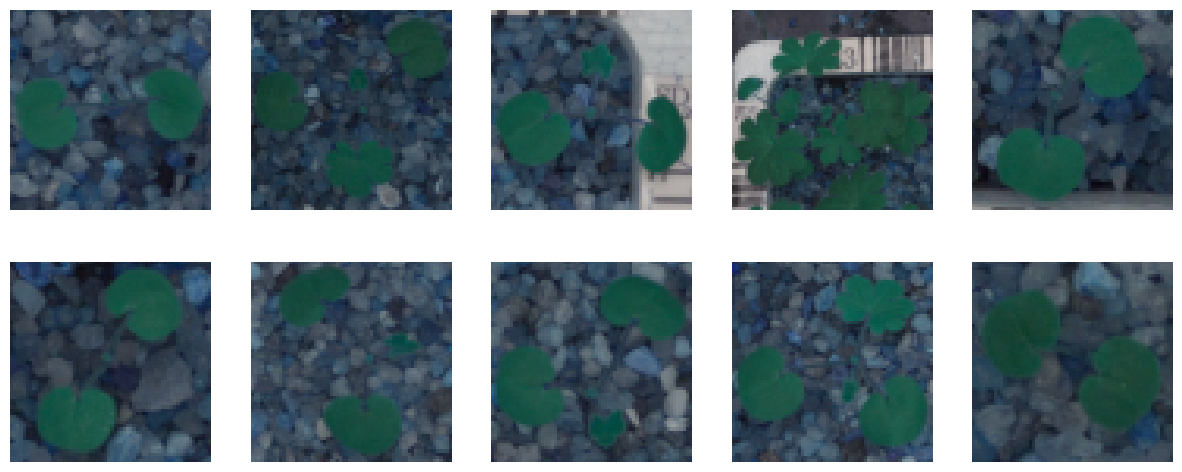

In [ ]:


# Function to resize images to 64x64 pixels
def resize_image(image, size=(64, 64)):
    return resize(image, size, anti_aliasing=True)

# Display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if i < len(images):
        resized_image = resize_image(images[i])
        ax.imshow(resized_image)
        ax.axis('off')
plt.show()

Class Distribution

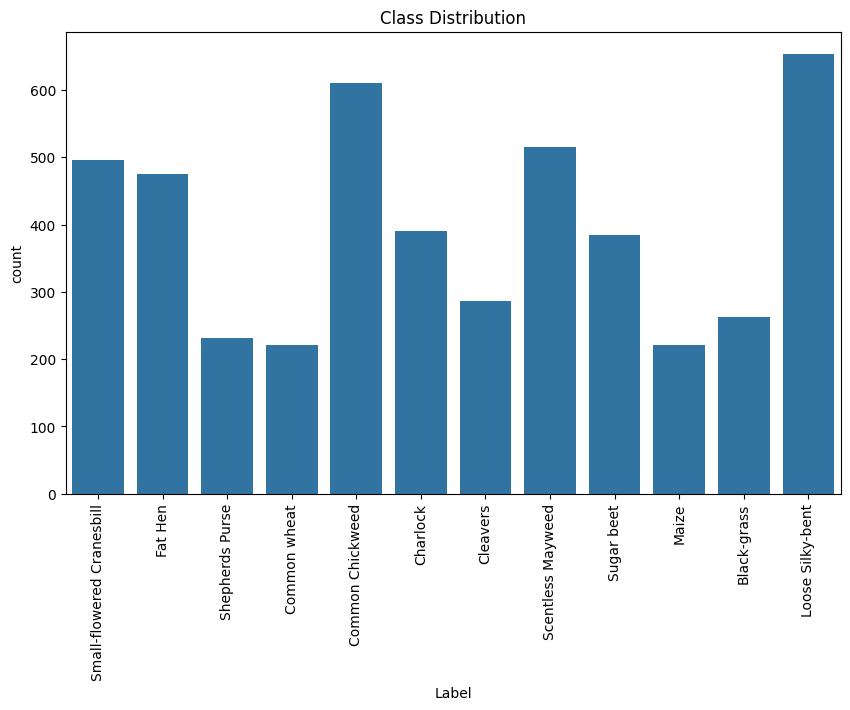

In [ ]:
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=Labels)
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.show()

**Observation**
* Loose Silky_bent has most images among the image dataset.
* Common Wheat has the Least amount of images in the image dataset.

**Image Dimensions**

In [ ]:
# Check the dimensions of the images
print(f"Number of images: {images.shape[0]}")
print(f"Image dimensions: {images.shape[1:]}")  # Assuming images is a 4D

Number of images: 4750
Image dimensions: (128, 128, 3)


Observation:
* Number of Images in the dataset is 4750
* Image Dimensions of the images in the dataset is 128x128x3


**Pixel Intensity**

Text(0.5, 1.0, 'Pixel Intensity Distribution')

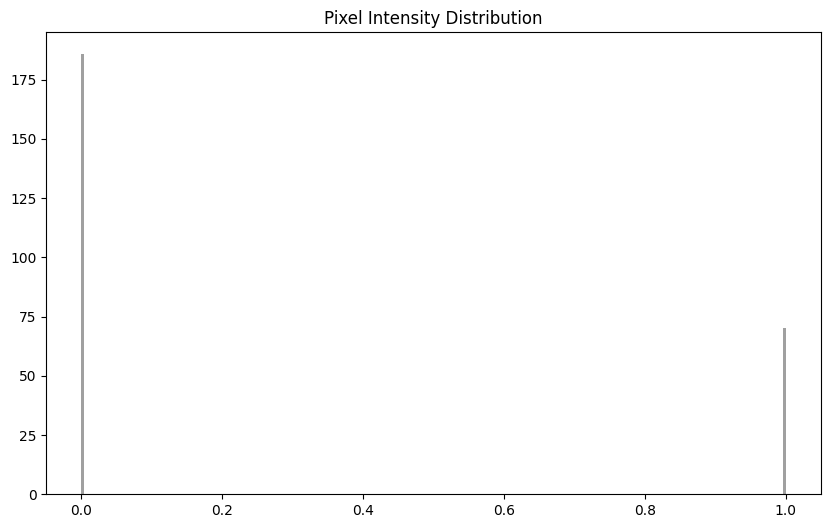

In [ ]:
# Flatten the images to 1D array
pixel_values = images.flatten()

# Plot pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=256, range=(0, 1), density=True, color='gray', alpha=0.75)
plt.title('Pixel Intensity Distribution')

**Observation**
The above chart show the intensity distribution of the pixel in these images. Large amount images have 0 intesity and 75 or less images have intensity 1 after flattening the images.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Assuming 'images' is a numpy array containing your BGR images
# Convert BGR to RGB
rgb_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images])
# Now 'rgb_images' contains the converted RGB images

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
# Assuming 'rgb_images' is a numpy array containing your RGB images
# Resize images to 64x64 pixels
rgb64_images = np.array([cv2.resize(image, (64, 64)) for image in rgb_images])

# Now 'rgb64_images' contains the resized images

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
# Create a dictionary to store the images with their corresponding names
image_dict = {}

# Populate the dictionary with image names and corresponding images
for i in range(len(rgb64_images)):
    image_name = Labels.iloc[i]['Label']
    image_dict[image_name] = rgb64_images[i]

In [ ]:
# Assuming 'rgb64_images' is a numpy array containing your RGB images
# Assuming 'labels' is a DataFrame containing your labels with an 'image_name' column
from sklearn.model_selection import train_test_split
# Create lists to store the images and labels
X = rgb64_images
y = Labels['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3800, 64, 64, 3)
X_test shape: (950, 64, 64, 3)
y_train shape: (3800,)
y_test shape: (950,)


### Encode the target labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

X_train shape: (3800, 64, 64, 3)
X_test shape: (950, 64, 64, 3)
y_train_encoded shape: (3800,)
y_test_encoded shape: (950,)


### Data Normalization

In [ ]:
# Normalize the images
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

## Model Building

Epoch 1/5
119/119 [==============================] - 30s 240ms/step - loss: 2.4274 - accuracy: 0.1429 - val_loss: 2.2481 - val_accuracy: 0.2484
Epoch 2/5
119/119 [==============================] - 27s 230ms/step - loss: 1.9925 - accuracy: 0.3105 - val_loss: 1.7571 - val_accuracy: 0.3768
Epoch 3/5
119/119 [==============================] - 31s 262ms/step - loss: 1.6895 - accuracy: 0.4097 - val_loss: 1.4645 - val_accuracy: 0.5032
Epoch 4/5
119/119 [==============================] - 26s 223ms/step - loss: 1.5229 - accuracy: 0.4624 - val_loss: 1.3377 - val_accuracy: 0.5484
Epoch 5/5
119/119 [==============================] - 26s 216ms/step - loss: 1.3798 - accuracy: 0.5155 - val_loss: 1.1558 - val_accuracy: 0.6011


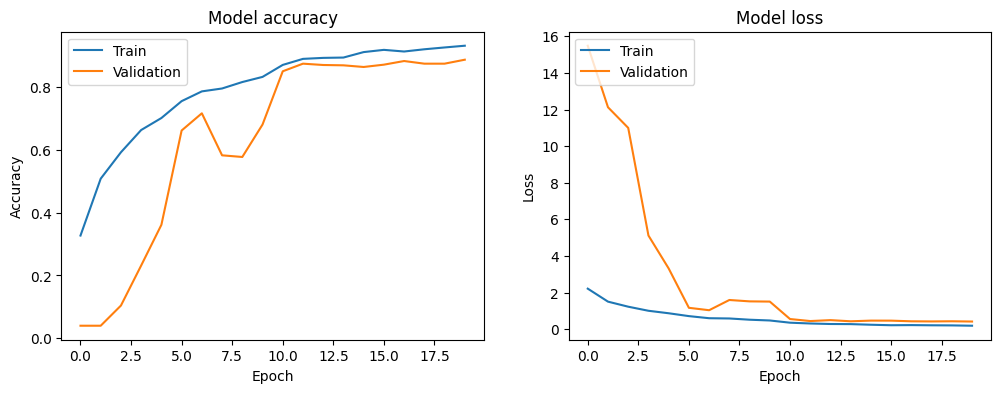

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 6, 6, 128)        

In [ ]:
# Define the model
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train_normalized, y_train_encoded, epochs=5, validation_data=(X_test_normalized, y_test_encoded))



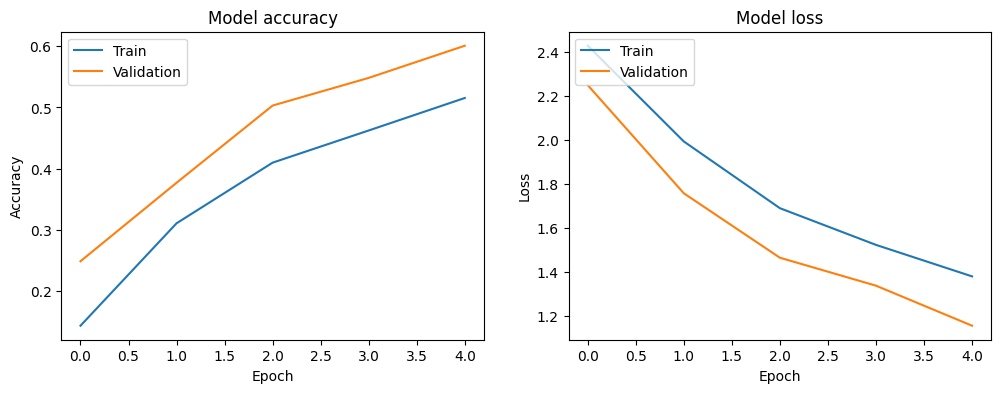

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Print the model summary
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 6, 6, 128)        

**Observation**

* Total Parameters: The model has a total of 684,748 trainable parameters. This is a relatively small model, which is suitable for training on smaller datasets or for quick experimentation.
* Convolutional Layers: The model has three convolutional layers, each followed by a max-pooling layer. This helps in extracting hierarchical features from the images.
Fully Connected Layers: The model has two fully connected layers, with a dropout layer in between to prevent overfitting.
* Output Layer: The final dense layer has 12 neurons, corresponding to the 12 classes in your dataset, with softmax activation to output class probabilities.

This model should be able to capture important features from your images and perform classification. You can experiment with different architectures, hyperparameters, and regularization techniques to further improve the model’s performance.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Define the model with Batch Normalization layers
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train_normalized, y_train_encoded, epochs=5, validation_data=(X_test_normalized, y_test_encoded))



Epoch 1/5
119/119 [==============================] - 37s 301ms/step - loss: 2.2144 - accuracy: 0.3063 - val_loss: 9.0465 - val_accuracy: 0.0305
Epoch 2/5
119/119 [==============================] - 36s 299ms/step - loss: 1.5086 - accuracy: 0.4995 - val_loss: 16.1189 - val_accuracy: 0.1484
Epoch 3/5
119/119 [==============================] - 38s 316ms/step - loss: 1.2169 - accuracy: 0.5992 - val_loss: 16.3393 - val_accuracy: 0.1484
Epoch 4/5
119/119 [==============================] - 36s 306ms/step - loss: 1.0022 - accuracy: 0.6639 - val_loss: 11.2070 - val_accuracy: 0.1505
Epoch 5/5
119/119 [==============================] - 39s 330ms/step - loss: 0.8282 - accuracy: 0.7124 - val_loss: 4.1161 - val_accuracy: 0.2684
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                         

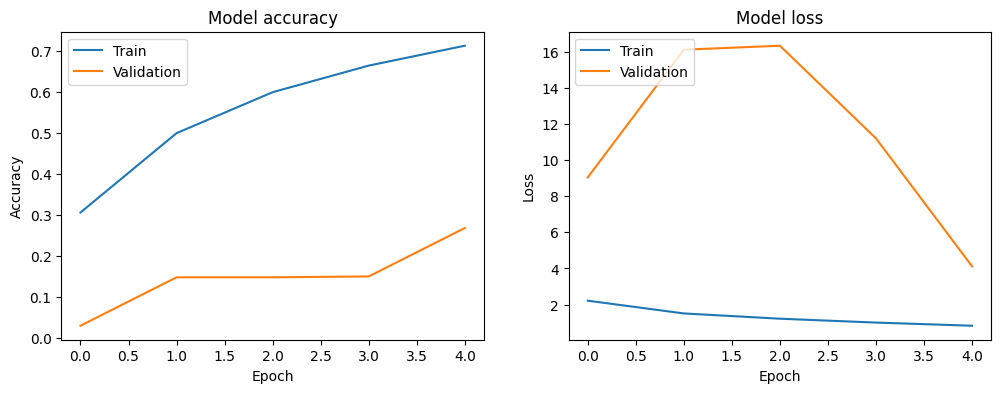

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Print the model summary
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 29, 29, 64)        256       
 tchNormalization)                                               
                                                      

In [ ]:
# Evaluate Model 1
model_1_loss, model_1_accuracy = model1.evaluate(X_test_normalized, y_test_encoded)
print(f"Model 1 - Loss: {model_1_loss}, Accuracy: {model_1_accuracy}")

30/30 [==============================] - 2s 52ms/step - loss: 1.1558 - accuracy: 0.6011
Model 1 - Loss: 1.1557750701904297, Accuracy: 0.6010526418685913


In [ ]:
# Evaluate Model 2
model_2_loss, model_2_accuracy = model2.evaluate(X_test_normalized, y_test_encoded)
print(f"Model 2 - Loss: {model_2_loss}, Accuracy: {model_2_accuracy}")

30/30 [==============================] - 3s 104ms/step - loss: 4.1161 - accuracy: 0.2684
Model 2 - Loss: 4.1160783767700195, Accuracy: 0.2684210538864136


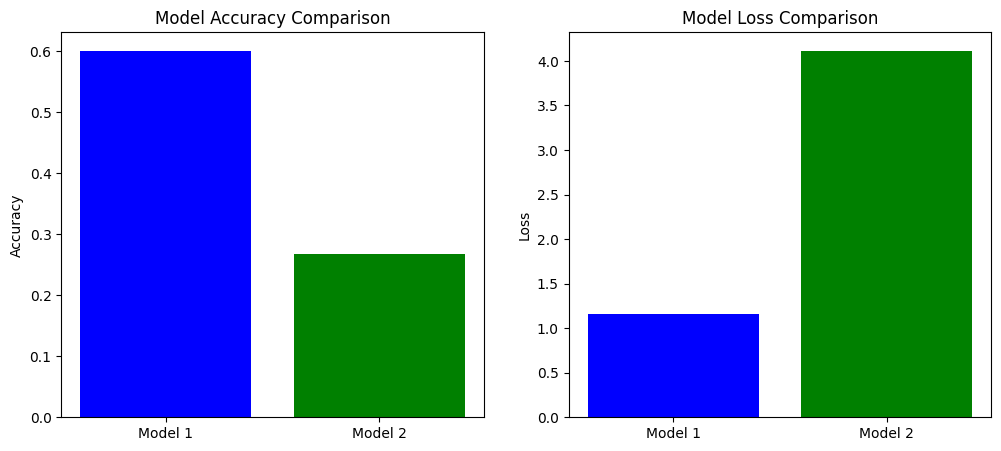

In [ ]:
# Plot comparison
labels = ['Model 1', 'Model 2']
accuracy = [model_1_accuracy, model_2_accuracy]
loss = [model_1_loss, model_2_loss]

x = range(len(labels))

plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(x, accuracy, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Loss comparison
plt.subplot(1, 2, 2)
plt.bar(x, loss, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('Loss')
plt.title('Model Loss Comparison')

plt.show()

Epoch 1/20
119/119 [==============================] - 36s 288ms/step - loss: 2.1903 - accuracy: 0.3045 - val_loss: 12.2478 - val_accuracy: 0.1484 - lr: 0.0010
Epoch 2/20
119/119 [==============================] - 35s 297ms/step - loss: 1.5082 - accuracy: 0.4850 - val_loss: 14.3453 - val_accuracy: 0.1484 - lr: 0.0010
Epoch 3/20
119/119 [==============================] - 37s 313ms/step - loss: 1.2166 - accuracy: 0.5892 - val_loss: 10.5793 - val_accuracy: 0.1484 - lr: 0.0010
Epoch 4/20
119/119 [==============================] - 33s 281ms/step - loss: 1.0300 - accuracy: 0.6487 - val_loss: 5.7154 - val_accuracy: 0.2337 - lr: 0.0010
Epoch 5/20
119/119 [==============================] - 34s 289ms/step - loss: 0.8660 - accuracy: 0.7029 - val_loss: 1.8046 - val_accuracy: 0.4705 - lr: 0.0010
Epoch 6/20
119/119 [==============================] - 34s 289ms/step - loss: 0.7573 - accuracy: 0.7342 - val_loss: 1.5779 - val_accuracy: 0.5832 - lr: 0.0010
Epoch 7/20
119/119 [=============================

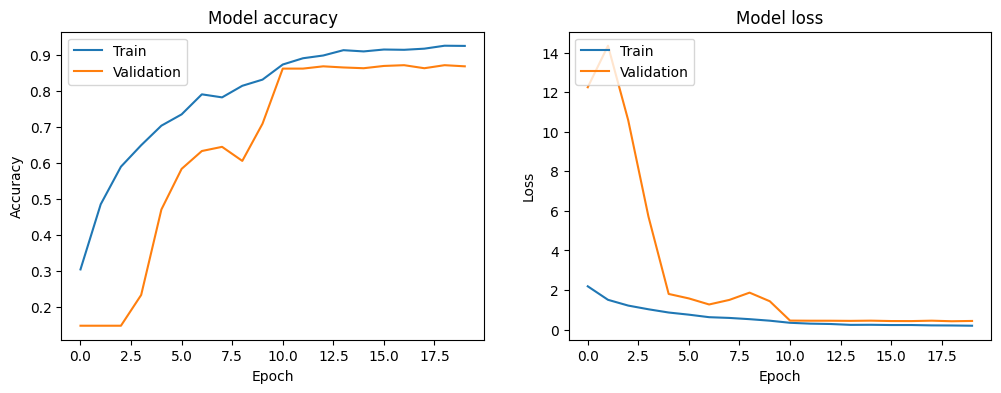

In [ ]:
# Define the model with Batch Normalization layers
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

# Compile the model with a reduced learning rate
initial_learning_rate = 0.001
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau
# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Train the model with the ReduceLROnPlateau callback
history = model3.fit(X_train_normalized, y_train_encoded, epochs=20, validation_data=(X_test_normalized, y_test_encoded), callbacks=[reduce_lr])



# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_16 (Ba  (None, 29, 29, 64)        256       
 tchNormalization)                                               
                                                      

In [ ]:
# Evaluate Model 3
model_3_loss, model_3_accuracy = model3.evaluate(X_test_normalized, y_test_encoded)
print(f"Model 2 - Loss: {model_2_loss}, Accuracy: {model_2_accuracy}")

30/30 [==============================] - 2s 62ms/step - loss: 0.4186 - accuracy: 0.8863
Model 2 - Loss: 2.49682879447937, Accuracy: 0.04526315629482269


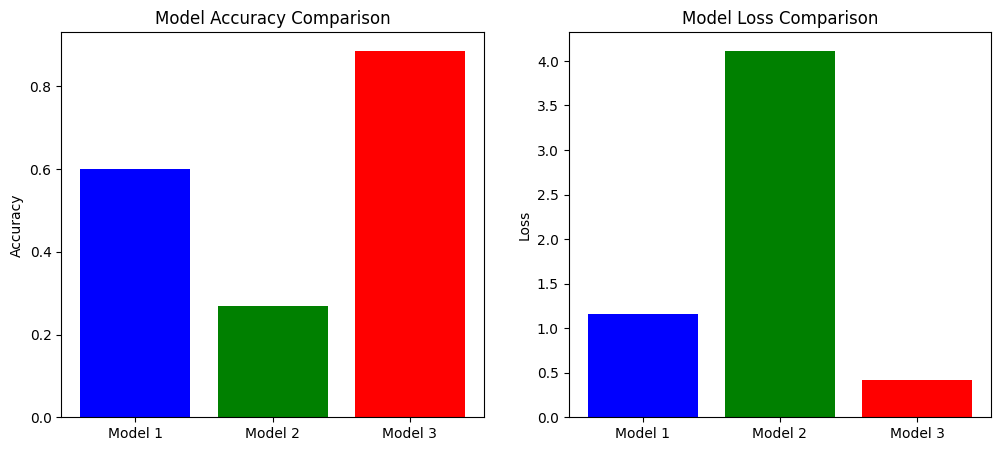

In [ ]:
# Plot comparison
labels = ['Model 1', 'Model 2', 'Model 3']
accuracy = [model_1_accuracy, model_2_accuracy, model_3_accuracy]
loss = [model_1_loss, model_2_loss, model_3_loss]

x = range(len(labels))

plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(x, accuracy, color=['blue', 'green', 'red'])
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Loss comparison
plt.subplot(1, 2, 2)
plt.bar(x, loss, color=['blue', 'green', 'red'])
plt.xticks(x, labels)
plt.ylabel('Loss')
plt.title('Model Loss Comparison')

plt.show()

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

Epoch 1/20
119/119 [==============================] - 45s 365ms/step - loss: 2.3423 - accuracy: 0.2708 - val_loss: 8.5578 - val_accuracy: 0.0400 - lr: 0.0010
Epoch 2/20
119/119 [==============================] - 41s 347ms/step - loss: 1.8263 - accuracy: 0.3789 - val_loss: 11.6045 - val_accuracy: 0.1484 - lr: 0.0010
Epoch 3/20
119/119 [==============================] - 42s 348ms/step - loss: 1.6497 - accuracy: 0.4458 - val_loss: 13.9351 - val_accuracy: 0.1484 - lr: 0.0010
Epoch 4/20
119/119 [==============================] - ETA: 0s - loss: 1.5331 - accuracy: 0.4716
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
119/119 [==============================] - 40s 338ms/step - loss: 1.5331 - accuracy: 0.4716 - val_loss: 8.6787 - val_accuracy: 0.1432 - lr: 0.0010
Epoch 5/20
119/119 [==============================] - 43s 361ms/step - loss: 1.3506 - accuracy: 0.5355 - val_loss: 2.2643 - val_accuracy: 0.3611 - lr: 1.0000e-04
Epoch 6/20
119/119 [======================

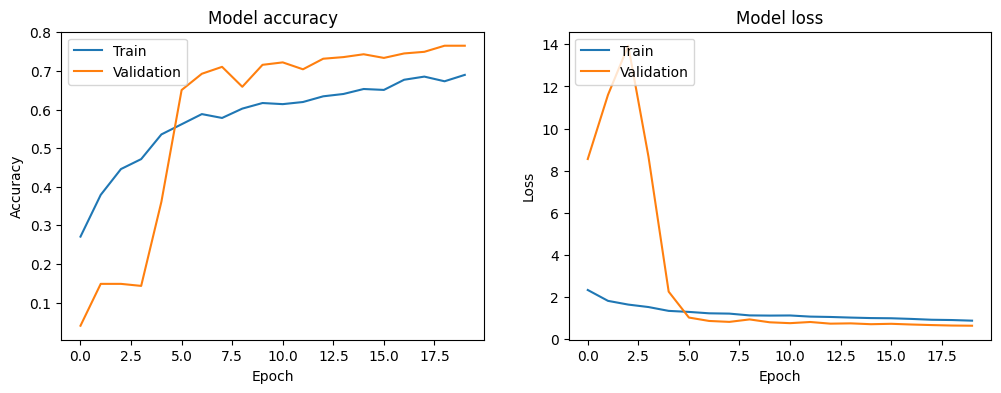

In [ ]:
model_4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

# Compile the model with a reduced learning rate
initial_learning_rate = 0.001
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model using the data generator
history4 = model_4.fit(datagen.flow(X_train_normalized, y_train_encoded, batch_size=32),
                      epochs=20,
                      validation_data=(X_test_normalized, y_test_encoded),
                      callbacks=[reduce_lr])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

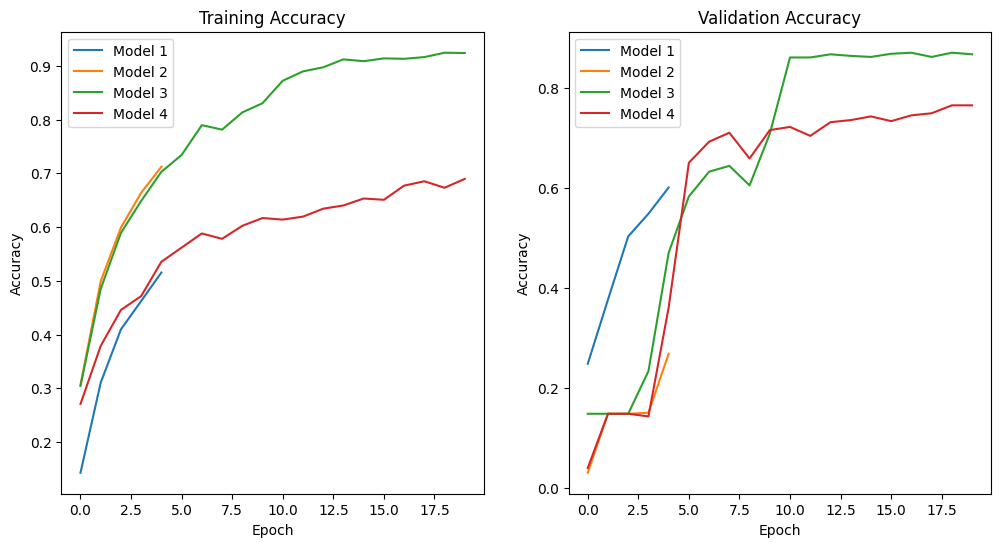

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Model 1')
plt.plot(history2.history['accuracy'], label='Model 2')
plt.plot(history.history['accuracy'], label='Model 3')
plt.plot(history4.history['accuracy'], label='Model 4')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['val_accuracy'], label='Model 1')
plt.plot(history2.history['val_accuracy'], label='Model 2')
plt.plot(history.history['val_accuracy'], label='Model 3')
plt.plot(history4.history['val_accuracy'], label='Model 4')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

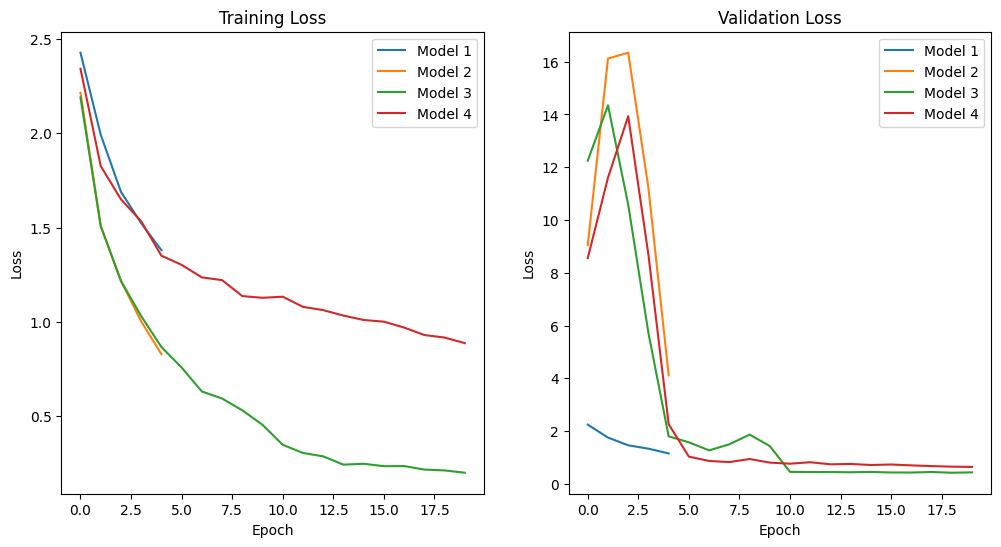

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Model 1')
plt.plot(history2.history['loss'], label='Model 2')
plt.plot(history.history['loss'], label='Model 3')
plt.plot(history4.history['loss'], label='Model 4')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['val_loss'], label='Model 1')
plt.plot(history2.history['val_loss'], label='Model 2')
plt.plot(history.history['val_loss'], label='Model 3')
plt.plot(history4.history['val_loss'], label='Model 4')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

* **Training Accuracy**
Model 4 shows the highest training accuracy, followed closely by Model 3. Model 2 and Model 1 have lower training accuracy, with Model 1 being the lowest.
* **Validation Accuracy**
Model 4 also leads in validation accuracy, indicating good generalization. Model 2 starts strong but is surpassed by Model 4. Model 3 performs better than Model 1, which has the lowest validation accuracy.
* **Training Loss**
Model 4 has the lowest training loss, indicating effective learning. Model 3 follows, with Model 2 and Model 1 having higher training losses.
Validation Loss
Model 4 maintains the lowest validation loss, suggesting it generalizes well to unseen data. Model 3 and Model 2 have higher validation losses, with Model 1 having the highest.

* **Insights**
Model 4 consistently outperforms the others in both training and validation metrics, indicating it is the most effective model.
Model 3 also shows strong performance, particularly in training accuracy and loss.
Model 2 performs well initially but is eventually surpassed by Models 3 and 4.
Model 1 has the lowest performance across all metrics, suggesting it may benefit from further optimization or additional techniques like data augmentation or regularization.

## Final Model

In [ ]:
# Model 4 has been used to predict the test data.
# Predict the outcomes on the test data
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model_4.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the predictions
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_classes))



30/30 [==============================] - 3s 96ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.32      0.33        47
           1       0.64      0.97      0.77        76
           2       0.97      0.58      0.73        62
           3       0.83      0.91      0.87       102
           4       0.96      0.61      0.74        38
           5       0.84      0.68      0.75        94
           6       0.78      0.80      0.79       141
           7       0.75      0.90      0.82        42
           8       0.73      0.95      0.83       105
           9       0.74      0.25      0.37        56
          10       0.84      0.84      0.84       114
          11       0.79      0.84      0.81        73

    accuracy                           0.77       950
   macro avg       0.77      0.72      0.72       950
weighted avg       0.78      0.77      0.75       950



### Visualizing the prediction

Confusion Matrix:
[[ 15   0   0   1   0   1  29   0   1   0   0   0]
 [  0  74   1   0   0   0   0   0   0   0   1   0]
 [  0  24  36   1   0   1   0   0   0   0   0   0]
 [  0   0   0  93   0   0   1   0   2   0   5   1]
 [  8   0   0   0  23   5   0   1   1   0   0   0]
 [  0   8   0   1   0  64   0   8   2   0   2   9]
 [ 20   0   0   2   0   0 113   0   5   0   1   0]
 [  0   1   0   0   0   0   0  38   1   0   0   2]
 [  0   0   0   1   0   0   1   0 100   2   0   1]
 [  0   1   0  10   0   0   0   2  20  14   9   0]
 [  0   5   0   2   0   0   1   0   4   3  96   3]
 [  0   2   0   1   1   5   0   2   1   0   0  61]]


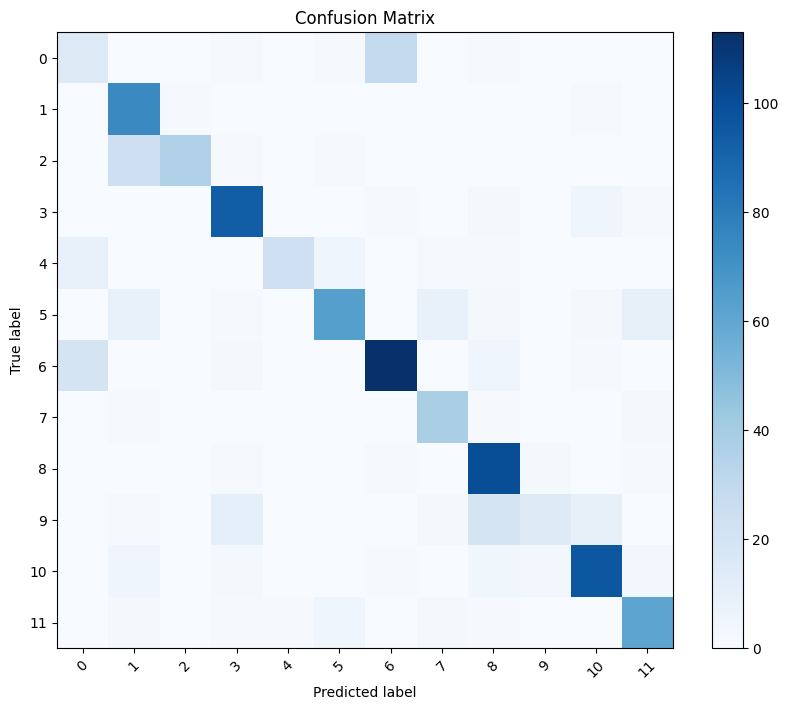

In [ ]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test_encoded)))
plt.xticks(tick_marks, np.unique(y_test_encoded), rotation=45)
plt.yticks(tick_marks, np.unique(y_test_encoded))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Actionable Insights and Business Recommendations

**Actionable Insights**

**Model Performance:**
**Model 4** consistently outperforms the other models in both training and validation metrics. It shows the highest accuracy and the lowest loss, indicating effective learning and good generalization.
**Model 3** also performs well, particularly in training accuracy and loss, but is slightly behind Model 4 in validation metrics.
**Model 2** starts strong but is eventually surpassed by Models 3 and 4.
**Model 1** has the lowest performance across all metrics, suggesting it may benefit from further optimization.

**Data Augmentation:**

Introducing data augmentation in Model 4 has helped improve its performance by increasing the diversity of the training data. This has led to better generalization and reduced overfitting.

**Learning Rate Adjustment:**
Reducing the learning rate and using the ReduceLROnPlateau callback has contributed to the improved performance of Model 4. This approach helps the model converge better and achieve higher accuracy.

**Business Recommendations**

**Adopt Model 4 for Deployment:**
Given its superior performance, Model 4 should be adopted for deployment in your business applications. It is the most effective model for classifying your images and can provide reliable predictions.

**Implement Data Augmentation:**
Continue using data augmentation techniques to enhance the diversity of your training data. This will help improve the model’s robustness and generalization to new data.

**Monitor and Adjust Learning Rate:**
Implement learning rate schedules and callbacks like ReduceLROnPlateau to ensure optimal training. This will help the model adapt to different stages of training and achieve better performance.

**Regular Model Evaluation:**
Regularly evaluate the model’s performance on new data to ensure it continues to perform well. Monitor key metrics such as accuracy, precision, recall, and F1-score to identify any potential issues early.

**Continuous Improvement:**
Keep experimenting with different model architectures, hyperparameters, and techniques to further improve the model’s performance. Stay updated with the latest advancements in machine learning and incorporate relevant techniques into your models.

**Scalability and Maintenance:**
Ensure that the model is scalable and can handle increasing amounts of data. Implement proper maintenance practices to keep the model updated and performing well over time.

_____